# R Basics

This is a note for the basics of R, an awesome language for data analysis. Here are some sample data I am going to use:

* stateData.csv: It contains information of all states in US.
* reddit.csv: It contains the survey results from reddit.com

## Table of Content

* [R Markdown](#r-markdown)
* [Working Directory](#working-directory)
* [Vector](#vector)
* [DataFrame](#dataframe)
* [Statistical Calculation](#statistical-calculation)

---

<a id = 'r-markdown'></a>
## R Markdown

R markdown is a very effective way to documente what you have wrote and share with others. The syntax is very similar to normal markdown. In RStudio, you can export .Rmd file into .html file through `KNIT HTML` button. You need to install and load `knitr` package first.

```{r}
install.packages('knitr', dependencies = T)
library(knitr)
```

References:

* [R Markdown Reference Guide](https://www.rstudio.com/wp-content/uploads/2015/03/rmarkdown-reference.pdf)
* [R Markdown Cheetsheet](https://www.rstudio.com/wp-content/uploads/2016/03/rmarkdown-cheatsheet-2.0.pdf)
---

<a id='working-directory'></a>
## Working Directory

Before working on any projects, you may want to set up a correct working directory. It is very simple to check the current working directory and change it.

In [1]:
getwd()

[1] "/Users/guanrongfu/GitHub/Toolkit/R"

In [2]:
setwd('..')
getwd()

[1] "/Users/guanrongfu/GitHub/Toolkit"

In [1]:
list.files()

[1] "R-Basics.ipynb" "reddit.csv"     "stateData.csv"

---

<a id = 'vector'></a>
## Vector

Vector is one of the data types in R. It looks like Python list, but it must contain the same type of data: character (string), logical (True or False) or numeric.

`c()` is a generic function that combines arguments to form a vector.

In [3]:
number <- c(1:10)
number

[1]  1  2  3  4  5  6  7  8  9 10

You can add value to a vector as well.

In [4]:
number <- c(number, 11:20)
number

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

You can select the value in a vector you want based on some boolean calculation, similar to Python Pandas Series.

In [5]:
name <- c('Amanda', 'Bob', 'Chris')

In [6]:
name_length = nchar(name)
name_length

[1] 6 3 5

In [7]:
name[name_length == 3]

[1] "Bob"

You need to be careful that you don't bring in too much data into R at once since R will hold all the data in working memory. You can delete some variables. 

In [8]:
rm(name_length)

---

<a id = 'matrices'></a>
## Matrices

Matrices is like a numpy two-dimensional array. All columns in a matrix must have the same mode (numberic, character, etc.) and the same length. The general format is:

my_matrix <- matrix(vector, nrow=r, ncol=c, byrow=FALSE, dimnames=list(char_vector_rownames, char_vector_colnames))

`byrow=FALSE` is the default choice, meaning the matrix should be filled by columns. `dimnames` provides optional labels for the columns and rows.

In [9]:
y <- matrix(1:20, nrow=5, ncol=4)
y

1,6,11,16
2,7,12,17
3,8,13,18
4,9,14,19
5,10,15,20


In [10]:
cells <- c(1, 26, 24, 68)
rnames <- c('R1', 'R2')
cnames <- c('C1', 'C2')
new_matrix <- matrix(cells, nrow=2, ncol=2, byrow=TRUE, dimnames=list(rnames, cnames))
new_matrix

,C1,C2
R1,1,26
R2,24,68


Similar to numpy, you can use index to find the elements you are looking for. Just remember R is **NOT** zero indexing. The index starts from **1**.

In [11]:
y[, 4]

[1] 16 17 18 19 20

In [12]:
y[1, ]

[1]  1  6 11 16

In [13]:
y[1:2, 2:3]

6,11
7,12


---

<a id = 'arrays'></a>
## Arrays

Arrays are similar to matrices but can have more than two dimenstions.

---

<a id = 'dataframe'></a>
## Data Frame

Data Frame is another data format in R. It has rows and columns, just like Excel files. It is more general than a matrix, you can have different data types (numeric, character, etc.) in different columns.

In [14]:
d <- c(1, 2, 3, 4)
e <- c('red', 'white', 'red', NA)
f <- c(TRUE, TRUE, TRUE, FALSE)
mydata <- data.frame(d, e, f)
names(mydata) <- c('ID', 'Color', 'Passed')
mydata

ID,Color,Passed
1,red,TRUE
2,white,TRUE
3,red,TRUE
4,NA,FALSE


Similar to Matrices, you can access the elements through indexing

In [15]:
mydata[1:2]

ID,Color
1,red
2,white
3,red
4,NA


In [16]:
mydata[c('ID', 'Passed')]

ID,Passed
1,TRUE
2,TRUE
3,TRUE
4,FALSE


In [17]:
mydata$Color

[1] red   white red   <NA> 
Levels: red white

You can easily get data frame by reading a .csv file into R. I am going to use 'stateData.csv' file for the following notes.

In [6]:
state_info <- read.csv('stateData.csv')

### Overview of DataFrame

In [7]:
state_info

X,state.abb,state.area,state.region,population,income,illiteracy,life.exp,murder,highSchoolGrad,frost,area
Alabama,AL,51609,2,3615,3624,2.1,69.05,15.1,41.3,20,50708
Alaska,AK,589757,4,365,6315,1.5,69.31,11.3,66.7,152,566432
Arizona,AZ,113909,4,2212,4530,1.8,70.55,7.8,58.1,15,113417
Arkansas,AR,53104,2,2110,3378,1.9,70.66,10.1,39.9,65,51945
California,CA,158693,4,21198,5114,1.1,71.71,10.3,62.6,20,156361
Colorado,CO,104247,4,2541,4884,0.7,72.06,6.8,63.9,166,103766
Connecticut,CT,5009,1,3100,5348,1.1,72.48,3.1,56.0,139,4862
Delaware,DE,2057,2,579,4809,0.9,70.06,6.2,54.6,103,1982
Florida,FL,58560,2,8277,4815,1.3,70.66,10.7,52.6,11,54090
Georgia,GA,58876,2,4931,4091,2.0,68.54,13.9,40.6,60,58073


In [8]:
head(state_info, 10) # Default is 6

X,state.abb,state.area,state.region,population,income,illiteracy,life.exp,murder,highSchoolGrad,frost,area
Alabama,AL,51609,2,3615,3624,2.1,69.05,15.1,41.3,20,50708
Alaska,AK,589757,4,365,6315,1.5,69.31,11.3,66.7,152,566432
Arizona,AZ,113909,4,2212,4530,1.8,70.55,7.8,58.1,15,113417
Arkansas,AR,53104,2,2110,3378,1.9,70.66,10.1,39.9,65,51945
California,CA,158693,4,21198,5114,1.1,71.71,10.3,62.6,20,156361
Colorado,CO,104247,4,2541,4884,0.7,72.06,6.8,63.9,166,103766
Connecticut,CT,5009,1,3100,5348,1.1,72.48,3.1,56.0,139,4862
Delaware,DE,2057,2,579,4809,0.9,70.06,6.2,54.6,103,1982
Florida,FL,58560,2,8277,4815,1.3,70.66,10.7,52.6,11,54090
Georgia,GA,58876,2,4931,4091,2.0,68.54,13.9,40.6,60,58073


In [9]:
tail(state_info, )

,X,state.abb,state.area,state.region,population,income,illiteracy,life.exp,murder,highSchoolGrad,frost,area
45,Vermont,VT,9609,1,472,3907,0.6,71.64,5.5,57.1,168,9267
46,Virginia,VA,40815,2,4981,4701,1.4,70.08,9.5,47.8,85,39780
47,Washington,WA,68192,4,3559,4864,0.6,71.72,4.3,63.5,32,66570
48,West Virginia,WV,24181,2,1799,3617,1.4,69.48,6.7,41.6,100,24070
49,Wisconsin,WI,56154,3,4589,4468,0.7,72.48,3.0,54.5,149,54464
50,Wyoming,WY,97914,4,376,4566,0.6,70.29,6.9,62.9,173,97203


In [10]:
names(state_info)

[1] "X"              "state.abb"      "state.area"     "state.region"  
 [5] "population"     "income"         "illiteracy"     "life.exp"      
 [9] "murder"         "highSchoolGrad" "frost"          "area"

In [11]:
str(state_info) # Structure

'data.frame':	50 obs. of  12 variables:
 $ X             : Factor w/ 50 levels "Alabama","Alaska",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ state.abb     : Factor w/ 50 levels "AK","AL","AR",..: 2 1 4 3 5 6 7 8 9 10 ...
 $ state.area    : int  51609 589757 113909 53104 158693 104247 5009 2057 58560 58876 ...
 $ state.region  : int  2 4 4 2 4 4 1 2 2 2 ...
 $ population    : int  3615 365 2212 2110 21198 2541 3100 579 8277 4931 ...
 $ income        : int  3624 6315 4530 3378 5114 4884 5348 4809 4815 4091 ...
 $ illiteracy    : num  2.1 1.5 1.8 1.9 1.1 0.7 1.1 0.9 1.3 2 ...
 $ life.exp      : num  69 69.3 70.5 70.7 71.7 ...
 $ murder        : num  15.1 11.3 7.8 10.1 10.3 6.8 3.1 6.2 10.7 13.9 ...
 $ highSchoolGrad: num  41.3 66.7 58.1 39.9 62.6 63.9 56 54.6 52.6 40.6 ...
 $ frost         : int  20 152 15 65 20 166 139 103 11 60 ...
 $ area          : int  50708 566432 113417 51945 156361 103766 4862 1982 54090 58073 ...


In [12]:
dim(state_info) # Dimension

[1] 50 12

In [13]:
summary(state_info)

          X        state.abb    state.area      state.region    population   
 Alabama   : 1   AK     : 1   Min.   :  1214   Min.   :1.00   Min.   :  365  
 Alaska    : 1   AL     : 1   1st Qu.: 37317   1st Qu.:2.00   1st Qu.: 1080  
 Arizona   : 1   AR     : 1   Median : 56222   Median :2.50   Median : 2838  
 Arkansas  : 1   AZ     : 1   Mean   : 72368   Mean   :2.58   Mean   : 4246  
 California: 1   CA     : 1   3rd Qu.: 83234   3rd Qu.:3.75   3rd Qu.: 4968  
 Colorado  : 1   CO     : 1   Max.   :589757   Max.   :4.00   Max.   :21198  
 (Other)   :44   (Other):44                                                  
     income       illiteracy       life.exp         murder      
 Min.   :3098   Min.   :0.500   Min.   :67.96   Min.   : 1.400  
 1st Qu.:3993   1st Qu.:0.625   1st Qu.:70.12   1st Qu.: 4.350  
 Median :4519   Median :0.950   Median :70.67   Median : 6.850  
 Mean   :4436   Mean   :1.170   Mean   :70.88   Mean   : 7.378  
 3rd Qu.:4814   3rd Qu.:1.575   3rd Qu.:71.89   3rd

### Rows

In [14]:
row.names(state_info)

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16" "17" "18" "19" "20" "21" "22" "23" "24" "25" "26" "27" "28" "29" "30"
[31] "31" "32" "33" "34" "35" "36" "37" "38" "39" "40" "41" "42" "43" "44" "45"
[46] "46" "47" "48" "49" "50"

In [15]:
row.names(state_info) <- c(11:60)
state_info

,X,state.abb,state.area,state.region,population,income,illiteracy,life.exp,murder,highSchoolGrad,frost,area
11,Alabama,AL,51609,2,3615,3624,2.1,69.05,15.1,41.3,20,50708
12,Alaska,AK,589757,4,365,6315,1.5,69.31,11.3,66.7,152,566432
13,Arizona,AZ,113909,4,2212,4530,1.8,70.55,7.8,58.1,15,113417
14,Arkansas,AR,53104,2,2110,3378,1.9,70.66,10.1,39.9,65,51945
15,California,CA,158693,4,21198,5114,1.1,71.71,10.3,62.6,20,156361
16,Colorado,CO,104247,4,2541,4884,0.7,72.06,6.8,63.9,166,103766
17,Connecticut,CT,5009,1,3100,5348,1.1,72.48,3.1,56.0,139,4862
18,Delaware,DE,2057,2,579,4809,0.9,70.06,6.2,54.6,103,1982
19,Florida,FL,58560,2,8277,4815,1.3,70.66,10.7,52.6,11,54090
20,Georgia,GA,58876,2,4931,4091,2.0,68.54,13.9,40.6,60,58073


### Columns

In [16]:
state_info$state.abb

[1] AL AK AZ AR CA CO CT DE FL GA HI ID IL IN IA KS KY LA ME MD MA MI MN MS MO
[26] MT NE NV NH NJ NM NY NC ND OH OK OR PA RI SC SD TN TX UT VT VA WA WV WI WY
50 Levels: AK AL AR AZ CA CO CT DE FL GA HI IA ID IL IN KS KY LA MA MD ... WY

In [17]:
state_info$population

[1]  3615   365  2212  2110 21198  2541  3100   579  8277  4931   868   813
[13] 11197  5313  2861  2280  3387  3806  1058  4122  5814  9111  3921  2341
[25]  4767   746  1544   590   812  7333  1144 18076  5441   637 10735  2715
[37]  2284 11860   931  2816   681  4173 12237  1203   472  4981  3559  1799
[49]  4589   376

You can add new column and assign value to that column.

In [18]:
state_info$college <- c(1, 2)
head(state_info)

,X,state.abb,state.area,state.region,population,income,illiteracy,life.exp,murder,highSchoolGrad,frost,area,college
11,Alabama,AL,51609,2,3615,3624,2.1,69.05,15.1,41.3,20,50708,1
12,Alaska,AK,589757,4,365,6315,1.5,69.31,11.3,66.7,152,566432,2
13,Arizona,AZ,113909,4,2212,4530,1.8,70.55,7.8,58.1,15,113417,1
14,Arkansas,AR,53104,2,2110,3378,1.9,70.66,10.1,39.9,65,51945,2
15,California,CA,158693,4,21198,5114,1.1,71.71,10.3,62.6,20,156361,1
16,Colorado,CO,104247,4,2541,4884,0.7,72.06,6.8,63.9,166,103766,2


You can drop a column as well.

In [19]:
state_info <- subset(state_info, select = -college)
head(state_info)

,X,state.abb,state.area,state.region,population,income,illiteracy,life.exp,murder,highSchoolGrad,frost,area
11,Alabama,AL,51609,2,3615,3624,2.1,69.05,15.1,41.3,20,50708
12,Alaska,AK,589757,4,365,6315,1.5,69.31,11.3,66.7,152,566432
13,Arizona,AZ,113909,4,2212,4530,1.8,70.55,7.8,58.1,15,113417
14,Arkansas,AR,53104,2,2110,3378,1.9,70.66,10.1,39.9,65,51945
15,California,CA,158693,4,21198,5114,1.1,71.71,10.3,62.6,20,156361
16,Colorado,CO,104247,4,2541,4884,0.7,72.06,6.8,63.9,166,103766


### Get subset of a Data Frame

Sometimes, it is not enough to only get rows or columns. You may want to get a subset of a Data Frame as well. There are two ways to achieve it:

* subset(dataframe, condition)
* dataframe[rows, columns]

In [32]:
subset(state_info, income > 5000 & population > 10000, 2:5)

,state.abb,state.area,state.region,population
15,CA,158693,4,21198
23,IL,56400,3,11197


In [33]:
state_info[state_info$population > 10000, ]

,X,state.abb,state.area,state.region,population,income,illiteracy,life.exp,murder,highSchoolGrad,frost,area
15,California,CA,158693,4,21198,5114,1.1,71.71,10.3,62.6,20,156361
23,Illinois,IL,56400,3,11197,5107,0.9,70.14,10.3,52.6,127,55748
42,New York,NY,49576,1,18076,4903,1.4,70.55,10.9,52.7,82,47831
45,Ohio,OH,41222,3,10735,4561,0.8,70.82,7.4,53.2,124,40975
48,Pennsylvania,PA,45333,1,11860,4449,1.0,70.43,6.1,50.2,126,44966
53,Texas,TX,267339,2,12237,4188,2.2,70.90,12.2,47.4,35,262134


---

<a id = 'lists'></a>
## Lists

Similar to Python lists, lists in R are an ordered collections of objects. It can contains various data type.

In [34]:
a <- c(1, 2, 5.3, 6, -2, 4)
y <- matrix(1:20, nrow=5, ncol=4)

li <- list(name='Fred', mynumbers=a, mymatrix=y, age=5.3)
li

1,6,11,16
2,7,12,17
3,8,13,18
4,9,14,19
5,10,15,20


You can identify elements of a list using the `[[]]` convention.

In [35]:
li[[2]]

[1]  1.0  2.0  5.3  6.0 -2.0  4.0

In [36]:
li[['age']]

[1] 5.3

<a id = 'factors'></a>
## Factors

When making a variable a factor, you tell R that the variable is nominal. The factor stores the nominal values as a vector of integers in range [1, k], and an internal vector of character strings mapped to these integers.

In [37]:
gender <- c(rep('male', 20), rep('female', 30))
gender

[1] "male"   "male"   "male"   "male"   "male"   "male"   "male"   "male"  
 [9] "male"   "male"   "male"   "male"   "male"   "male"   "male"   "male"  
[17] "male"   "male"   "male"   "male"   "female" "female" "female" "female"
[25] "female" "female" "female" "female" "female" "female" "female" "female"
[33] "female" "female" "female" "female" "female" "female" "female" "female"
[41] "female" "female" "female" "female" "female" "female" "female" "female"
[49] "female" "female"

In [38]:
gender <- factor(gender)
gender

[1] male   male   male   male   male   male   male   male   male   male  
[11] male   male   male   male   male   male   male   male   male   male  
[21] female female female female female female female female female female
[31] female female female female female female female female female female
[41] female female female female female female female female female female
Levels: female male

There is no obvious differences other than the remove of "''", but internally, R stores gender as 20 1s and 30 2s and associates 1=female, 2=male (alphabetically). R now treats gender as a nominal variable.

An ordered factor is used to represent an ordinal variable. R will treat factors as nominal variables and ordered factors as ordinal variables in statistical proceedures and graphical analyses. You can use options in the factor() and ordered() functions to control the mapping of integers to strings (overiding the alphabetical ordering). You can also use factors to create value labels.

To illustrate, I am going to use 'reddit.csv' as an example. It contains the survey results from reddit.com.

In [1]:
reddit <- read.csv('reddit.csv')
head(reddit)

id,gender,age.range,marital.status,employment.status,military.service,children,education,country,state,income.range,fav.reddit,dog.cat,cheese
1,0,25-34,NA,Employed full time,NA,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,NA,NA
2,0,25-34,NA,Employed full time,NA,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,NA,NA
3,1,18-24,NA,Freelance,NA,No,Some college,United States,Virginia,"Under $20,000",snackexchange,NA,NA
4,0,25-34,NA,Freelance,NA,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,NA,NA
5,1,25-34,NA,Employed full time,NA,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,NA,NA
6,0,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,I like dogs.,Cheddar


In [2]:
table(reddit$employment.status) # count each factors


                   Employed full time                             Freelance 
                                14814                                  1948 
Not employed and not looking for work    Not employed, but looking for work 
                                  682                                  2087 
                              Retired                               Student 
                                   85                                 12987 

In [3]:
str(reddit)

'data.frame':	32754 obs. of  14 variables:
 $ id               : int  1 2 3 4 5 6 7 8 9 10 ...
 $ gender           : int  0 0 1 0 1 0 0 0 0 0 ...
 $ age.range        : Factor w/ 7 levels "18-24","25-34",..: 2 2 1 2 2 2 2 1 3 2 ...
 $ marital.status   : Factor w/ 6 levels "Engaged","Forever Alone",..: NA NA NA NA NA 4 3 4 4 3 ...
 $ employment.status: Factor w/ 6 levels "Employed full time",..: 1 1 2 2 1 1 1 4 1 2 ...
 $ military.service : Factor w/ 2 levels "No","Yes": NA NA NA NA NA 1 1 1 1 1 ...
 $ children         : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ education        : Factor w/ 7 levels "Associate degree",..: 2 2 5 2 2 2 5 2 2 5 ...
 $ country          : Factor w/ 439 levels " Canada"," Canada eh",..: 394 394 394 394 394 394 125 394 394 125 ...
 $ state            : Factor w/ 53 levels "","Alabama","Alaska",..: 33 33 48 33 6 33 1 6 33 1 ...
 $ income.range     : Factor w/ 8 levels "$100,000 - $149,999",..: 2 2 8 2 7 2 NA 7 2 7 ...
 $ fav.reddit       : Factor

In [4]:
levels(reddit$age.range)

[1] "18-24"       "25-34"       "35-44"       "45-54"       "55-64"      
[6] "65 or Above" "Under 18"

In [5]:
library(ggplot2)

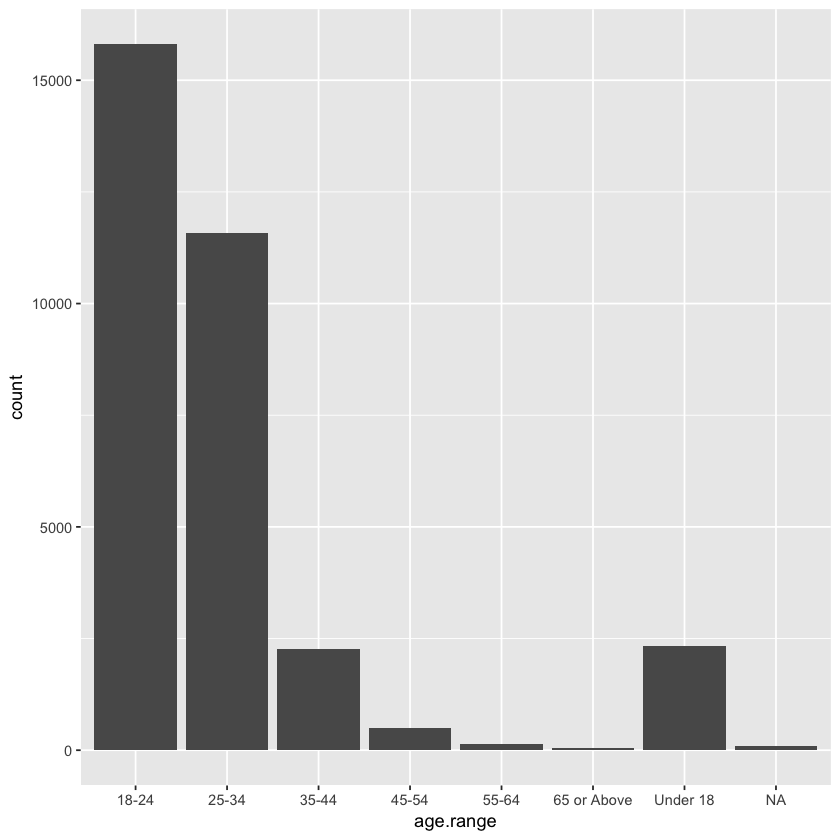

In [7]:
qplot(data=reddit, x=age.range)

As you can see, this is not a well-ordered plot. "Under 18" should be at the beginning of this plot. This is because `factor` doesn't have an order in it. There are two ways to correct it. One is to use `ordered` function.

In [8]:
reddit$age.range <- ordered(reddit$age.range, levels <- c('Under 18', "18-24", 
                                                          "25-34", "35-44", "45-54", "55-64", "65 or Above"))

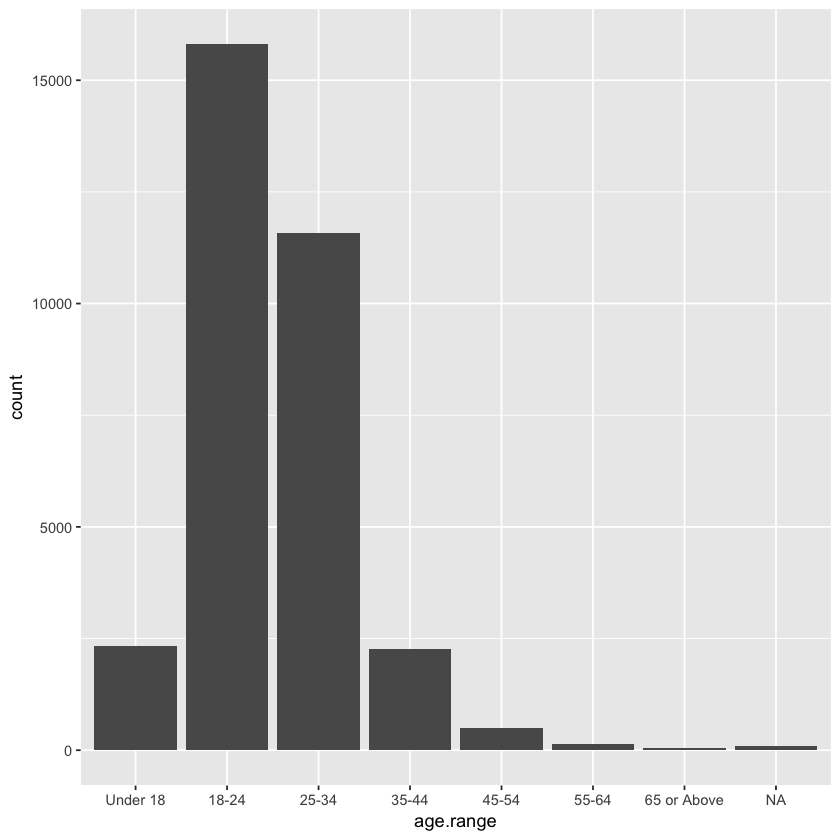

In [9]:
qplot(data=reddit, x=age.range)

The other one is to use `factor()` function with `ordered` parameter.

In [10]:
reddit$age.range <- factor(reddit$age.range, levels <- c('Under 18', "18-24", 
                                                          "25-34", "35-44", "45-54", "55-64", "65 or Above"),
                          ordered=T)

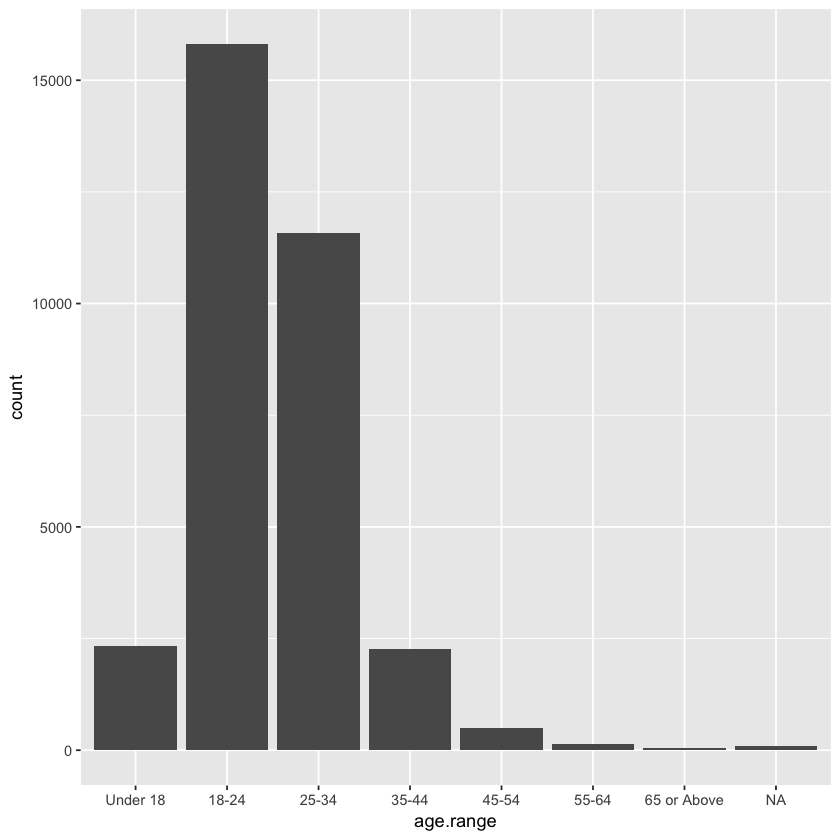

In [11]:
qplot(data=reddit, x=age.range)

---

<a id = 'basic-functions'></a>
## Basic Functions

In [39]:
length(gender)

[1] 50

In [40]:
str(gender)

 Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 2 2 2 ...


In [41]:
class(gender)

[1] "factor"

In [42]:
class(state_info)

[1] "data.frame"

In [43]:
names(state_info)

[1] "X"              "state.abb"      "state.area"     "state.region"  
 [5] "population"     "income"         "illiteracy"     "life.exp"      
 [9] "murder"         "highSchoolGrad" "frost"          "area"

In [44]:
c(1, 2, 3) # vector

[1] 1 2 3

In [45]:
cbind(1, 2, 3) # column

1,2,3


In [46]:
rbind(1, 2, 3) # row

1
2
3


In [47]:
ls() # list all objects

[1] "a"          "cells"      "cnames"     "d"          "e"         
 [6] "f"          "gender"     "li"         "mydata"     "name"      
[11] "new_matrix" "number"     "rnames"     "state_info" "y"

In [48]:
rm(y) # remove an object

<a id = 'statistical-calculation'></a>
## Statistical Calculation

In [48]:
mean(state_info$population)

[1] 4246.42

In [27]:
by(pf$friend_count, pf$gender, summary)

pf$gender: female
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0      37      96     242     244    4923 
------------------------------------------------------------ 
pf$gender: male
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0      27      74     165     182    4917 

## ggplot2

### Documentations

* [Theme](http://ggplot2.tidyverse.org/reference/theme.html)
* [scale](http://ggplot2.tidyverse.org/reference/scale_continuous.html)
* [Position scale](http://ggplot2.tidyverse.org/reference/scale_continuous.html)
* [Multiple plots in one graph](http://lightonphiri.org/blog/ggplot2-multiple-plots-in-one-graph-using-gridextra)
* <a href="http://www.cookbook-r.com/Graphs/Facets_(ggplot2)/">Facet</a>
    * facet_wrap(formula)
    * facet_wrap(~variable)

    * facet_grid(formula)
    * facet_grid(vertical~horizontal)
    

In [10]:
library(ggplot2)

In [7]:
pf <- read.csv('pseudo_facebook.tsv', sep='\t')

In [9]:
names(pf)

[1] "userid"                "age"                   "dob_day"              
 [4] "dob_year"              "dob_month"             "gender"               
 [7] "tenure"                "friend_count"          "friendships_initiated"
[10] "likes"                 "likes_received"        "mobile_likes"         
[13] "mobile_likes_received" "www_likes"             "www_likes_received"

### Histogram

You can use both qplot() and ggplot() functions to create histogram.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


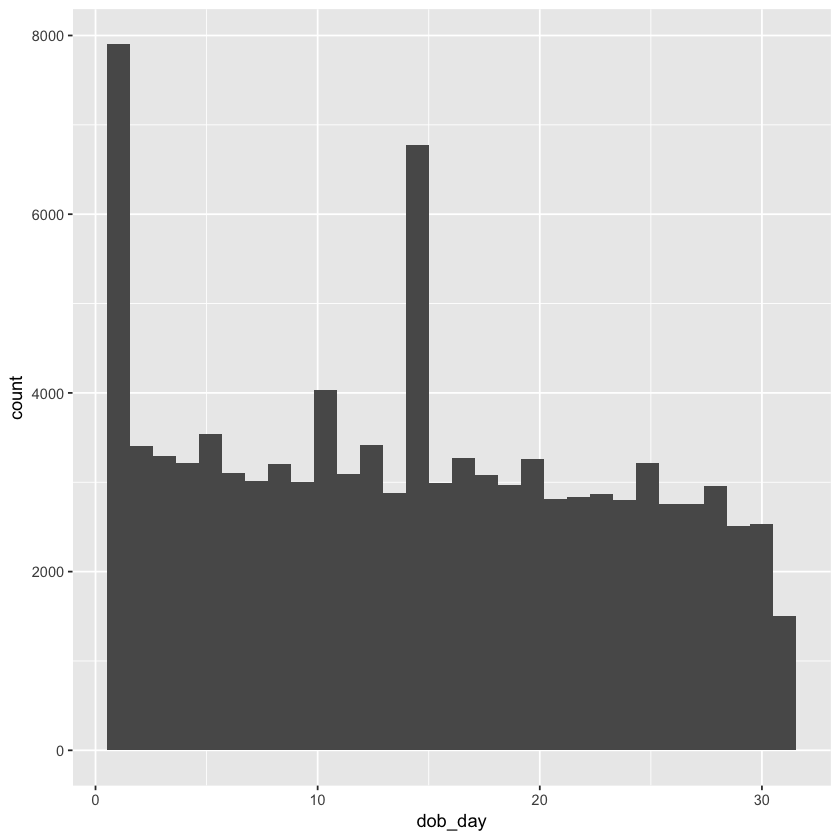

In [11]:
qplot(data=pf, x=dob_day)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


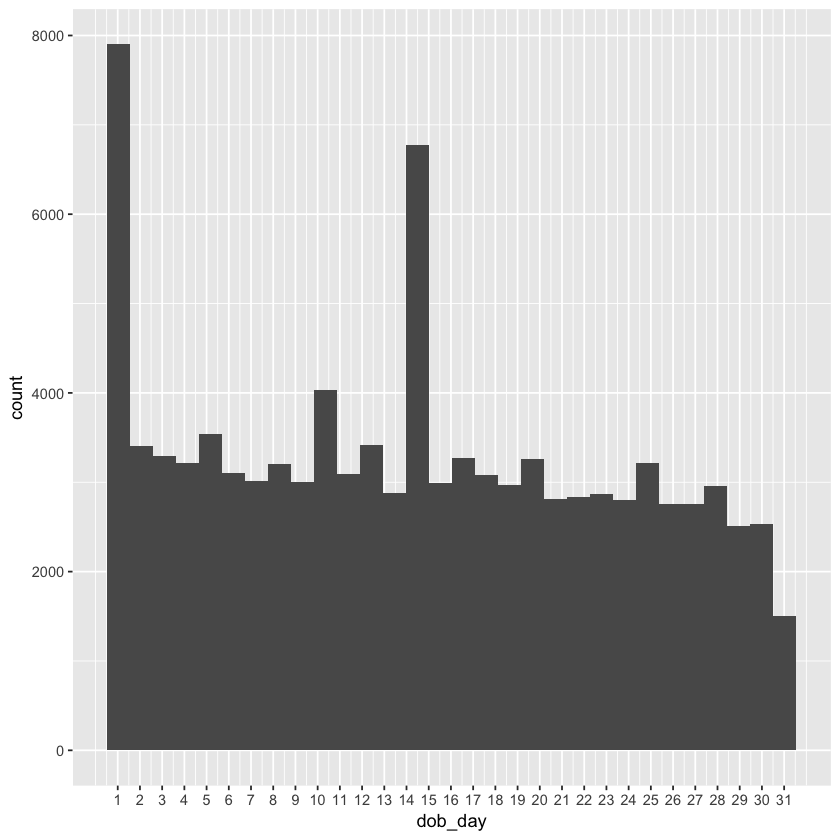

In [15]:
qplot(data=pf, x=dob_day) + scale_x_continuous(breaks=1:31)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


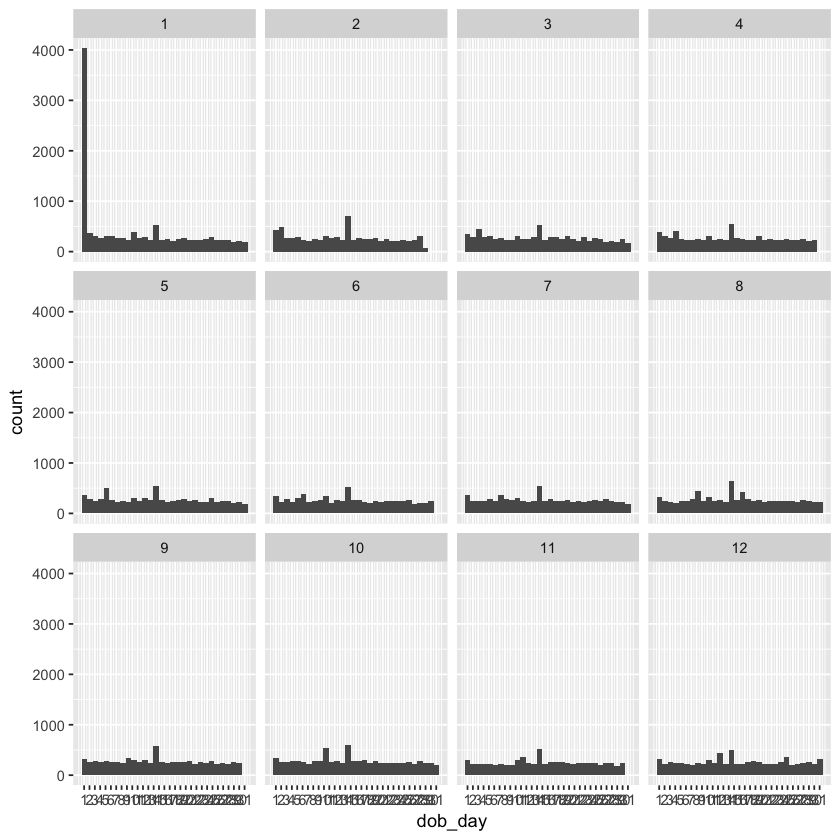

In [17]:
qplot(data=pf, x=dob_day) +
    scale_x_continuous(breaks=1:31) +
    facet_wrap(~dob_month, ncol=4, scales)

You can also add limitation to the plots to see part of the plots. Two ways to do:

* qplot(xlim=c(x, y)
* qplot() + 
    scale_x_continuous(limits=c(x, y))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2951 rows containing non-finite values (stat_bin).”

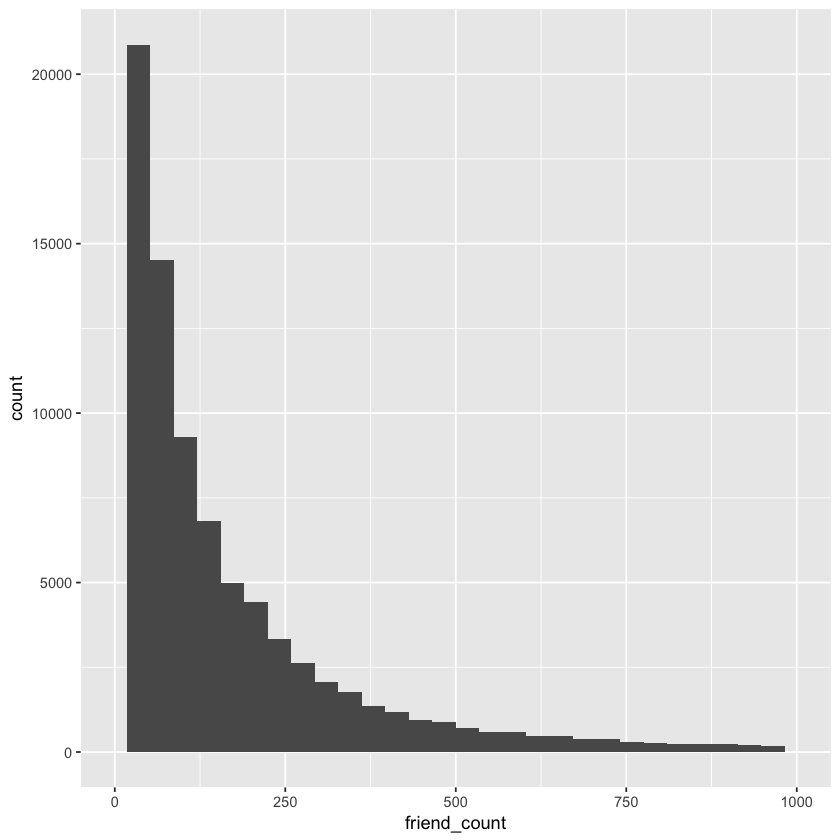

In [18]:
qplot(data=pf, x=friend_count, xlim=c(0, 1000))

You can also control the bin width and the breaks.

Warning message:
“Removed 2951 rows containing non-finite values (stat_bin).”

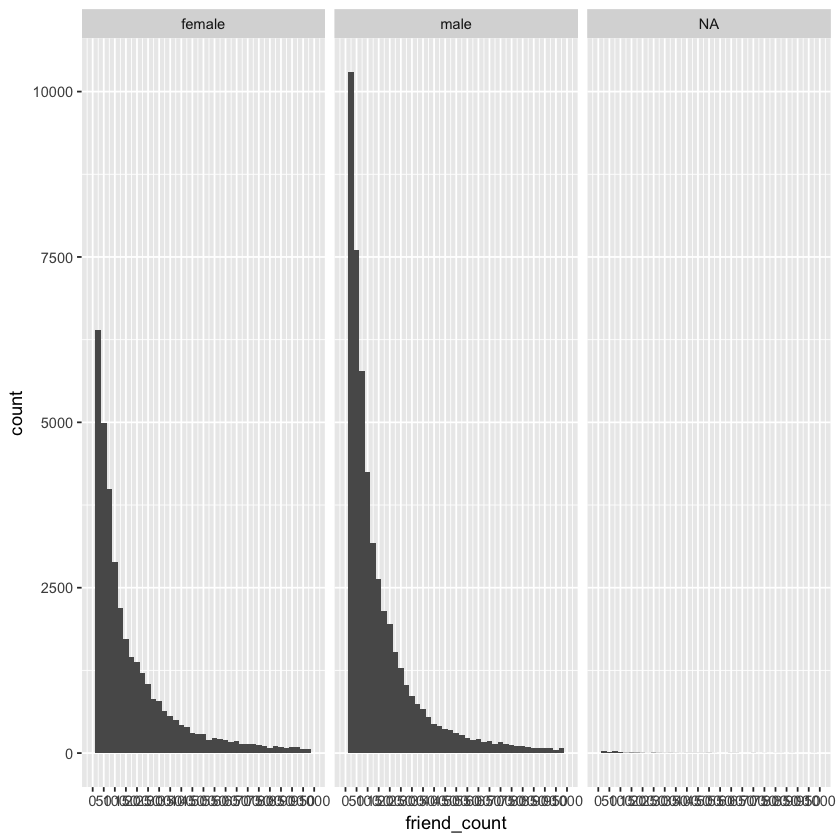

In [20]:
qplot(data=pf, x=friend_count, binwidth=25) +
    scale_x_continuous(limits=c(0, 1000), breaks=seq(0, 1000, 50)) +
    facet_wrap(~gender)

This is unexpected since there is NA. We can remove NA using subset we learned before. We can use both subset and `na.omit(dataset)` function. However, `na.omit(dataset)` will remove all rows that have NA.

Warning message:
“Removed 2949 rows containing non-finite values (stat_bin).”

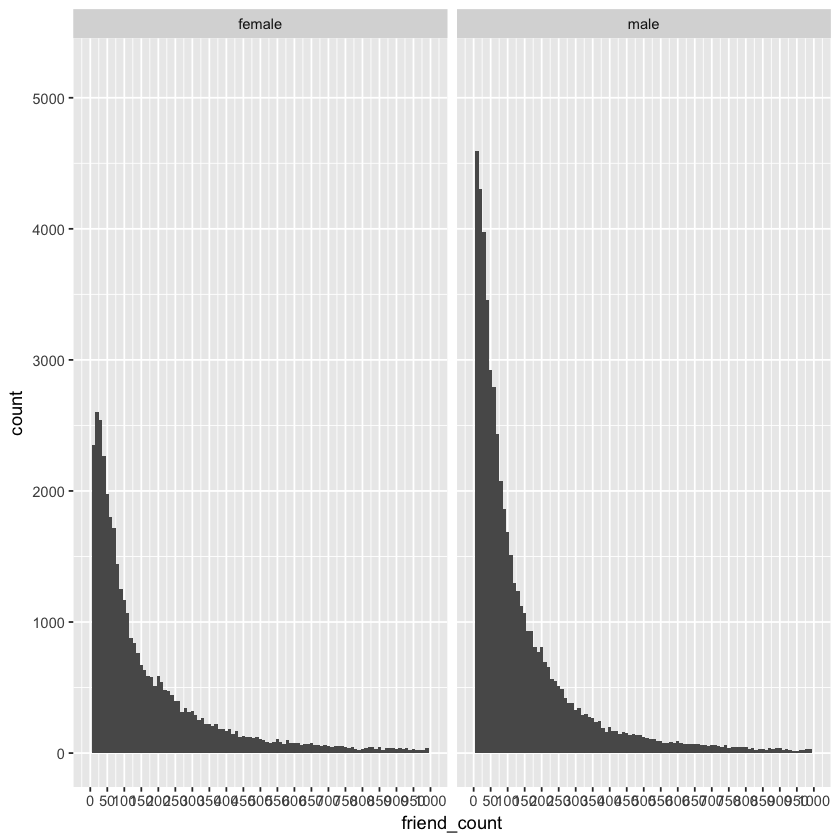

In [23]:
qplot(data=subset(pf, !is.na(gender)), x=friend_count, binwidth=10) +
    scale_x_continuous(lim=c(0, 1000), breaks=seq(0, 1000, 50)) +
    facet_wrap(~gender)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 26 rows containing non-finite values (stat_bin).”

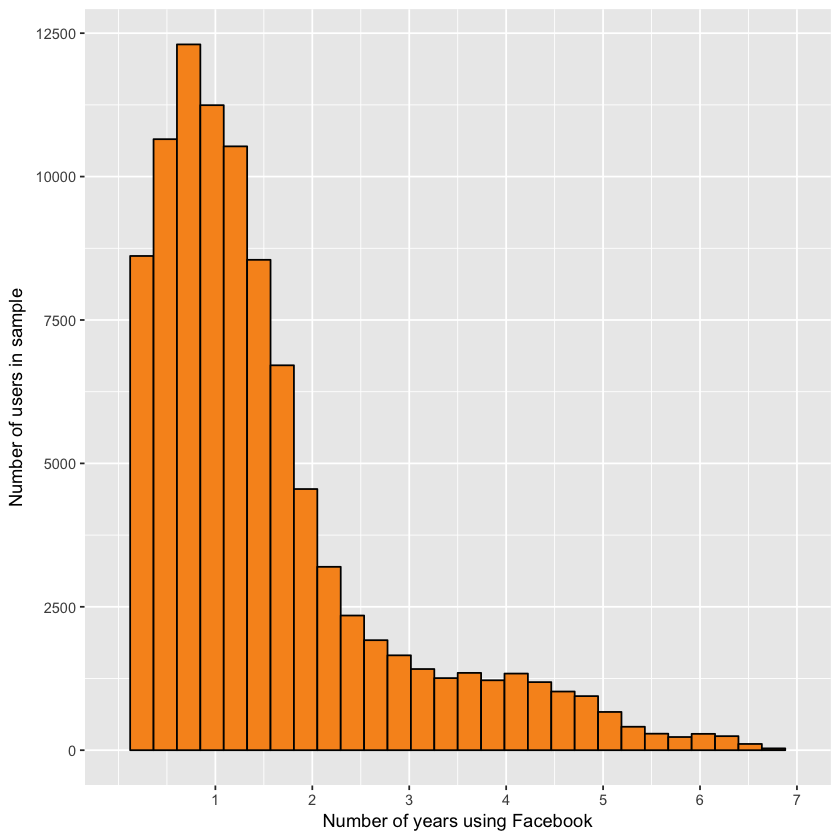

In [28]:
qplot(data=pf, x=tenure/365, xlab = 'Number of years using Facebook', ylab = 'Number of users in sample',
     color = I('black'), fill = I('#F79420')) +
    scale_x_continuous(breaks=seq(1, 7, 1), lim=c(0, 7))

You can also use ggplot() to create the histogram.

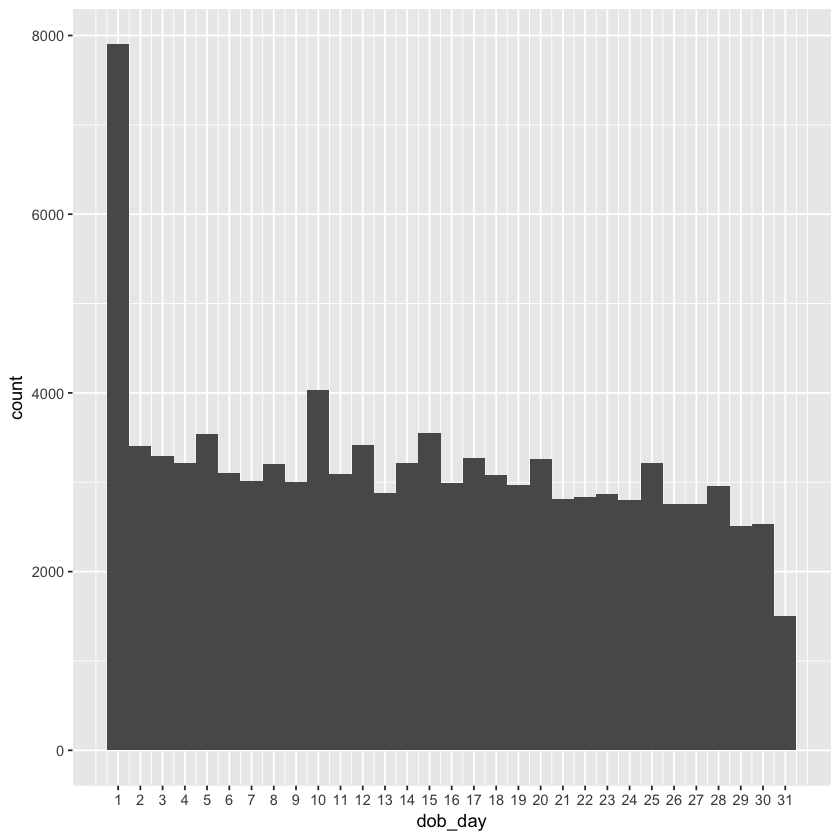

In [16]:
ggplot(aes(x=dob_day), data=pf) + 
    geom_histogram(binwidth=1) +
    scale_x_continuous(breaks=1:31)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 26 rows containing non-finite values (stat_bin).”

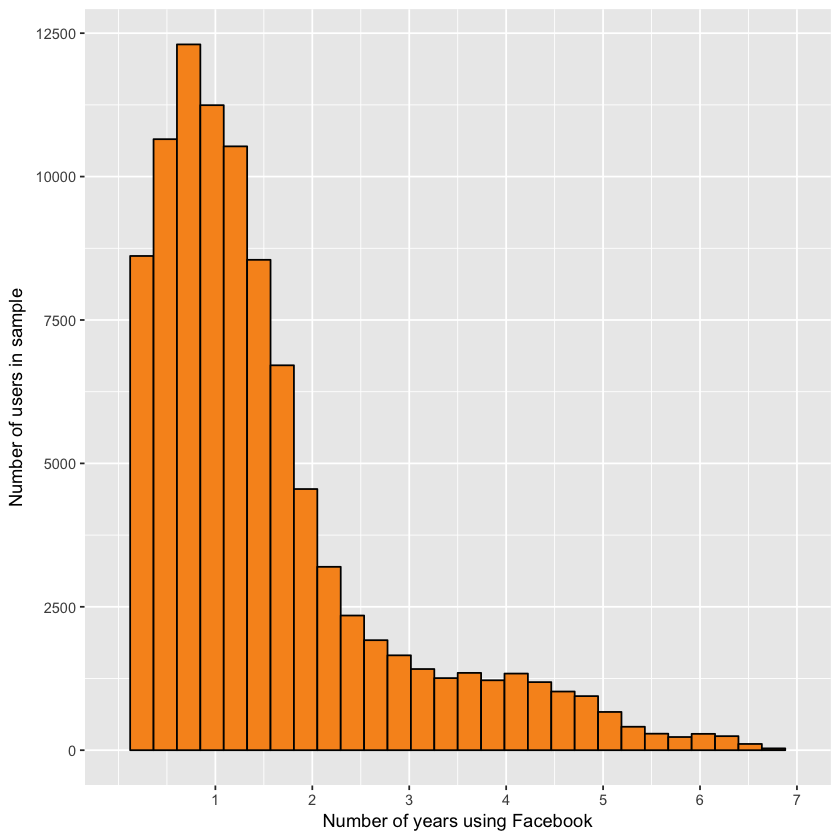

In [36]:
ggplot(data=pf, aes(x=tenure/365)) + 
    geom_histogram(color = I('black'), fill = I('#F79420')) +
    scale_x_continuous(breaks=seq(1, 7, 1), lim=c(0, 7)) +
    xlab('Number of years using Facebook') + 
    ylab('Number of users in sample')

Warning message:
“Transformation introduced infinite values in continuous x-axis”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1962 rows containing non-finite values (stat_bin).”

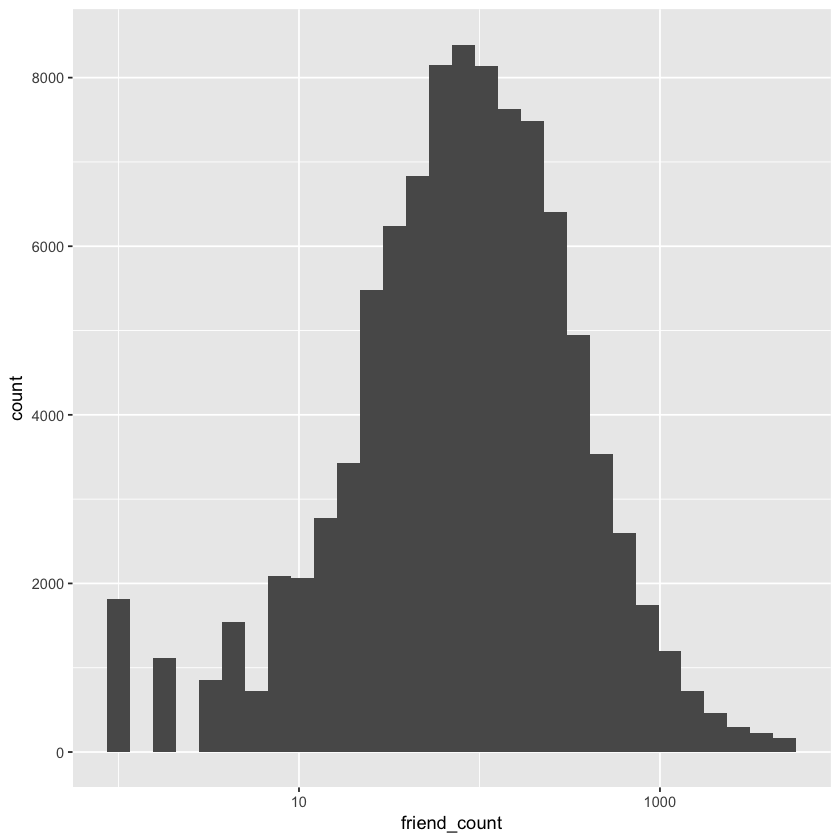

In [55]:
qplot(data=pf, x=friend_count) +
    scale_x_log10()

### Frequency Polygon

Warning message:
“Removed 2949 rows containing non-finite values (stat_bin).”Warning message:
“Removed 4 rows containing missing values (geom_path).”

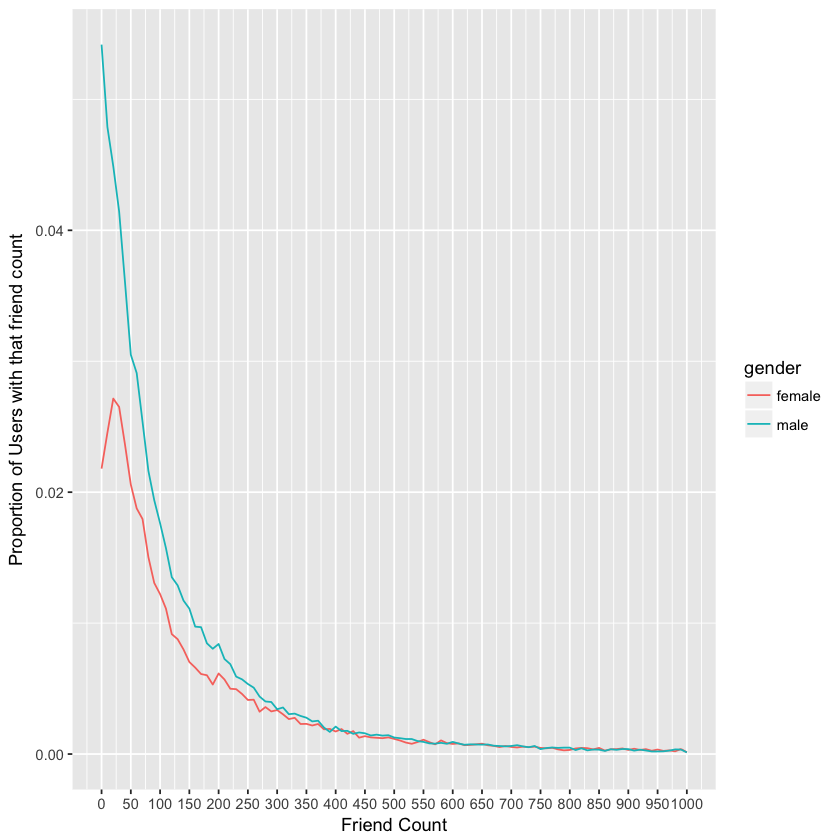

In [45]:
qplot(data=subset(pf, !is.na(gender)), x=friend_count, y=..count../sum(..count..), 
    binwidth=10, geom='freqpoly', color=gender,
    xlab='Friend Count',
    ylab='Proportion of Users with that friend count') + 
    scale_x_continuous(lim=c(0, 1000), breaks=seq(0, 1000, 50))

Warning message:
“Removed 2949 rows containing non-finite values (stat_bin).”Warning message:
“Removed 4 rows containing missing values (geom_path).”

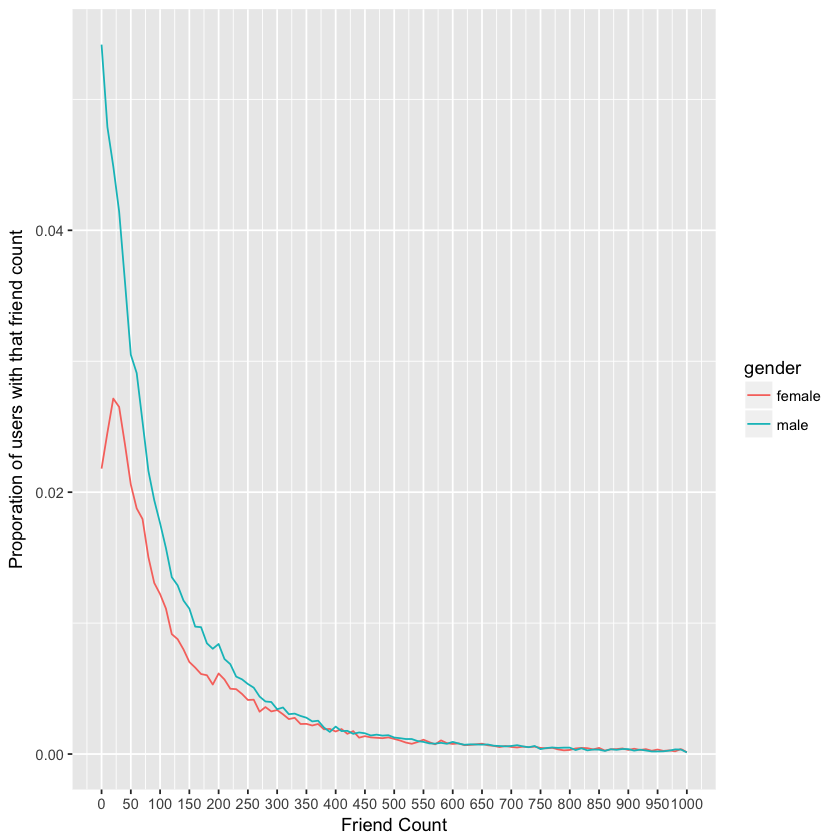

In [46]:
ggplot(data=subset(pf, !is.na(gender)), aes(x=friend_count, y=..count../sum(..count..))) +
    geom_freqpoly(aes(color=gender), binwidth=10) +
    scale_x_continuous(lim=c(0, 1000), breaks=seq(0, 1000, 50)) +
    xlab('Friend Count') +
    ylab('Proporation of users with that friend count')

### Box Plots

Warning message:
“Removed 11176 rows containing non-finite values (stat_boxplot).”

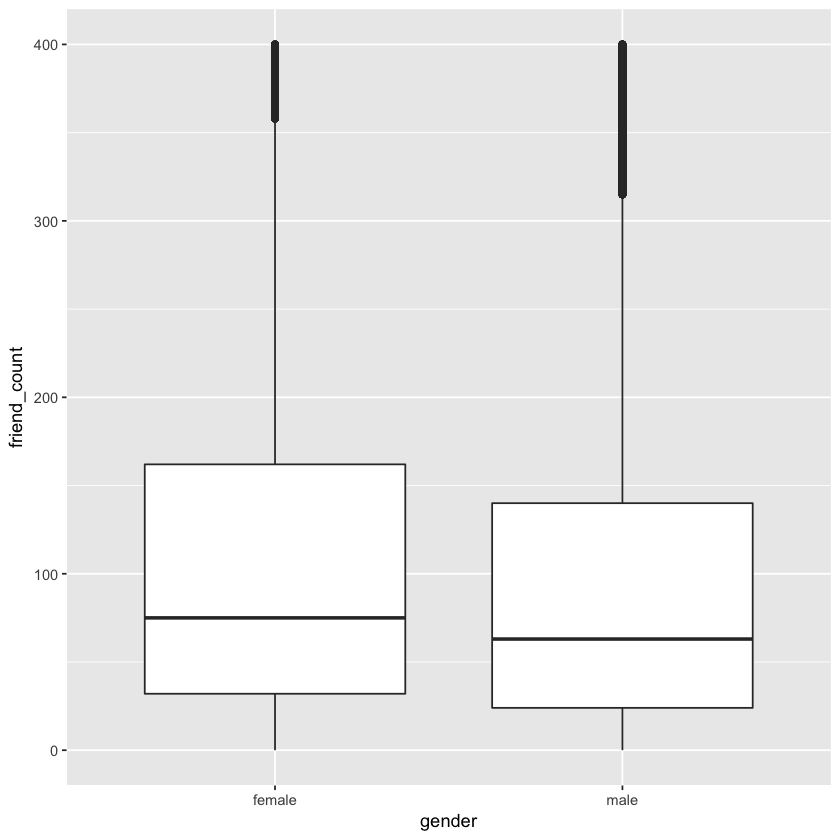

In [60]:
qplot(data=subset(pf, !is.na(gender)), x=gender, y=friend_count, geom='boxplot', ylim=c(0,400))

The above code will remove some outliers, which will influence the boxplot. To better present the data, you can use `coord_cartesian`.

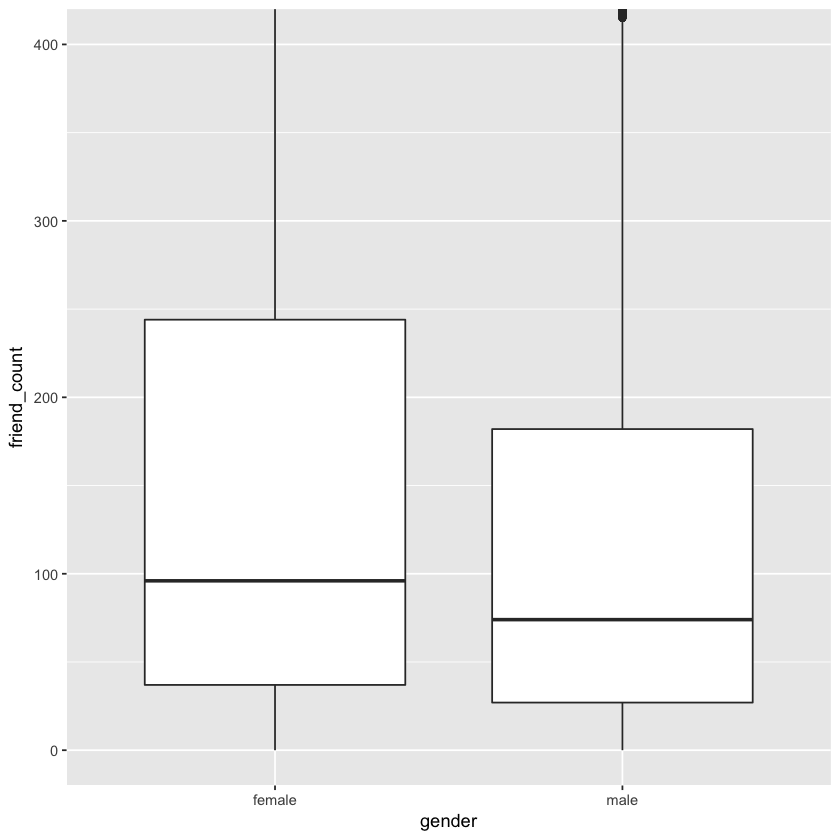

In [62]:
qplot(data=subset(pf, !is.na(gender)), x=gender, y=friend_count, geom='boxplot') +
    coord_cartesian(ylim = c(0, 400))

Afte drawing the plot, you can use `ggsave()` to save it. `ggsave` currently recognises the extensions eps/ps, tex (pictex), pdf, jpeg, tiff, png, bmp, svg and wmf (windows only).